In [1]:
import os
import pandas as pd
import numpy as np
import json
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

En esta seccion voy a anidar los json de dos estados: nevada y california y voy a anidar toda la metadata. El fin es crear un dataset con las reseñas de nevada y california y otro dataset con la metadata de nevada y california para eso lo que une ambos dataset es el gmap_id

In [2]:
# #codigo para anidar todos los json de un estado en un solo dataset
# carpeta = ''
# dataframes = []

# for archivo in os.listdir(carpeta):
#     if archivo.endswith('.json'):
#         ruta_archivo = os.path.join(carpeta, archivo)
#         with open(ruta_archivo, 'r') as f:
#             for linea in f:
#                 try:
#                     datos = json.loads(linea)
#                     dataframes.append(datos)  # Agregar los datos a la lista
#                 except json.JSONDecodeError:
#                     continue

# df_nevada = pd.DataFrame(dataframes)  # Crear el DataFrame fuera del bucle


In [3]:
#veo la dimension de un dataset de un estado
#df_nevada.shape

In [4]:
#veo como se ven las primeras filas
#df_nevada.head()

In [5]:
#levanto el archivo que habia creado para california
df_california=pd.read_csv('california.csv')

In [6]:
#levanto el archivo que habia creado para nevada
df_nevada=pd.read_csv('nevada.csv')

In [7]:
#creo una nueva columna llamada estado dentro del dataset de nevada
df_nevada=df_nevada.assign(estado='nevada')

In [8]:
#creo una nueva columna llamada estado dentro del dataset de california
df_california=df_california.assign(estado='california')

In [9]:
#concateno los estados de nevada y california
df_cal_nev=pd.concat([df_nevada, df_california], keys=['user_id', 'name', 'time','rating', 'text', 'pics','resp', 'gmap_id', 'estado'])

In [10]:
df_cal_nev.head()

user_id                 name           time  rating  \
user_id 0  109760533704769269727      Richard Bennett  1494872798260       5   
        1  111285959955400430302       Veronica Scott  1509605781969       5   
        2  114239262895495645039       Michael Turley  1532368183944       5   
        3  110274204021472204524           Lloyd Aoki  1526083661204       4   
        4  112150921411598281873  Pedro Pineda Lacruz  1509315435142       5   

                                           text pics resp  \
user_id 0  You'll​ enjoy getting turned around!  NaN  NaN   
        1                   Always a great stop  NaN  NaN   
        2                        Now that's big  NaN  NaN   
        3            great prices and selection  NaN  NaN   
        4              Same to other store IKEA  NaN  NaN   

                                         gmap_id  estado  
user_id 0  0x80c8b8787f26d109:0x62372cc75ffa8bc2  nevada  
        1  0x80c8b8787f26d109:0x62372cc75ffa8bc2  nevada  
        2  0x80c8b8787f26d109:0x62372cc75ffa8bc2  nevada  
        3  0x80c8b8787f26d109:0x62372cc75ffa8bc2  nevada  
        4  0x80c8b8787f26d109:0x62372cc75ffa8bc2  nevada

In [11]:
#veo la fimension final del dataset
df_cal_nev.shape

(4500000, 9)

In [12]:
# tranformo la columna time que estaba en formato int a decha
def transformar_timestamp(timestamp):
    marca_tiempo = timestamp / 1000
    fecha_hora = datetime.fromtimestamp(marca_tiempo)
    formato_fecha_hora = fecha_hora.strftime("%Y-%m-%d %H:%M:%S")
    return formato_fecha_hora

# Aplicar la transformación a la columna
df_cal_nev['time'] = df_cal_nev['time'].apply(transformar_timestamp)

In [13]:
df_cal_nev.head()

user_id                 name                 time  \
user_id 0  109760533704769269727      Richard Bennett  2017-05-15 15:26:38   
        1  111285959955400430302       Veronica Scott  2017-11-02 03:56:21   
        2  114239262895495645039       Michael Turley  2018-07-23 14:49:43   
        3  110274204021472204524           Lloyd Aoki  2018-05-11 21:07:41   
        4  112150921411598281873  Pedro Pineda Lacruz  2017-10-29 19:17:15   

           rating                                  text pics resp  \
user_id 0       5  You'll​ enjoy getting turned around!  NaN  NaN   
        1       5                   Always a great stop  NaN  NaN   
        2       5                        Now that's big  NaN  NaN   
        3       4            great prices and selection  NaN  NaN   
        4       5              Same to other store IKEA  NaN  NaN   

                                         gmap_id  estado  
user_id 0  0x80c8b8787f26d109:0x62372cc75ffa8bc2  nevada  
        1  0x80c8b8787f26d109:0x62372cc75ffa8bc2  nevada  
        2  0x80c8b8787f26d109:0x62372cc75ffa8bc2  nevada  
        3  0x80c8b8787f26d109:0x62372cc75ffa8bc2  nevada  
        4  0x80c8b8787f26d109:0x62372cc75ffa8bc2  nevada

In [14]:
# #codigo para anidar toda la metadata en un solo dataset
# carpeta_2 = ''
# dataframes_2 = []

# for archivo in os.listdir(carpeta_2):
#     if archivo.endswith('.json'):
#         ruta_archivo_2 = os.path.join(carpeta_2, archivo)
        
#         with open(ruta_archivo_2, 'r') as f:
#             for linea in f:
#                 try:
#                     datos = json.loads(linea)
#                     dataframes_2.append(datos)  # Agregar los datos a la lista
#                 except json.JSONDecodeError:
#                     continue

# df_metadata = pd.DataFrame(dataframes_2)  # C

In [15]:
#veo la dimension de la metadata
#df_metadata.shape    

In [16]:
#veo las primeras filas de la metadata
#df_metadata.head()

In [17]:
# # obtengo los gmap unicos del dataset con los estados de nevada y california para filtrar el dataset de metadata
# valores_unicos = df_cal_nev['gmap_id'].unique()

# # Crear una máscara booleana basada en los valores únicos
# mascara = df_metadata['gmap_id'].isin(valores_unicos)

# # Filtrar el segundo DataFrame utilizando la máscara booleana
# df_metadata_filtrado = df_metadata[mascara]


In [18]:
#levanto el archivo que habia creado para otro estado
df_metadata_filtrado=pd.read_csv('google_metadata_filtrada.csv')

In [19]:
#veo la nueva dimension de la metadata
df_metadata_filtrado.shape

(85715, 15)

In [20]:
#guardo los archivos en formato csv
#df_metadata_filtrado.to_csv('google_metadata_filtrada.csv', index=False)
#df_nevada.to_csv('nevada.csv', index=False)
#df_final.to_json('indiana.json', orient='records')
#df_filtrado.to_parquet('google_metadata_filtrada.parquet')

In [21]:
df_metadata_filtrado.iloc[0,6]

'[\'Shoe store\', "Children\'s clothing store", \'Clothing store\', \'Hat shop\', "Men\'s clothing store", \'Sporting goods store\', \'Sportswear store\', \'T-shirt store\', "Women\'s clothing store"]'

In [22]:
df_metadata_filtrado['category'].isnull().sum()

80

In [23]:
#elimino los nulos de categorias
df_metadata_filtrado=df_metadata_filtrado.dropna(subset=['category'])

In [24]:
df_metadata_filtrado['category'] = df_metadata_filtrado['category'].str.lower()

In [25]:
df_metadata_filtrado.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Finish Line (located inside Macy's),"Finish Line (located inside Macy's), 750 W 7th...",0x80c2c7b4033612a7:0x23ead2a7d7710cff,Retail chain carrying a large selection of ath...,34.047980,-118.258601,"['shoe store', ""children's clothing store"", 'c...",3.7,28,$$,"[['Thursday', '10AM–9PM'], ['Friday', '10AM–9P...","{'Service options': ['In-store pickup', 'In-st...",Open ⋅ Closes 9PM,"['0x80c2c7cb1a84794f:0x19b8fe9f650e9c93', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,Equinox West Hollywood,"Equinox West Hollywood, 8590 Sunset Blvd, West...",0x80c2bebcfef913f3:0x2ef1ca2c3cea2218,NaN,34.092260,-118.378775,"['gym', 'personal trainer', 'physical fitness ...",3.9,68,NaN,"[['Thursday', '5:30AM–9:30PM'], ['Friday', '5:...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 9:30PM,"['0x80c2bec595c99803:0x5f88ea0fb2bb3398', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
2,American Airlines Terminal 5 (2nd of 2 Terminals),American Airlines Terminal 5 (2nd of 2 Termina...,0x80c2b189cca1cce5:0x38300103ea62a29c,NaN,33.942504,-118.404649,['airline'],3.7,76,NaN,"[['Thursday', 'Open 24 hours'], ['Friday', 'Op...",{'Accessibility': ['Wheelchair accessible entr...,Open 24 hours,"['0x80c2b1265107a287:0x2fcbd34c93eec762', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,Bank of America Financial Center,"Bank of America Financial Center, 7800 Sunset ...",0x80c2bec31e7f716b:0x5189537b3cd877d0,NaN,34.097838,-118.359595,"['bank', 'financial consultant', 'financial pl...",3.0,34,NaN,"[['Thursday', '9AM–4PM'], ['Friday', '9AM–4PM'...",{'Accessibility': ['Wheelchair accessible elev...,Closed ⋅ Opens 9AM Fri,"['0x80c2bec238c4c661:0x7e36310f380314d3', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
4,Green Zone Recycling Center,"Green Zone Recycling Center, 225 Industrial Wa...",0x8084d1170a9d365f:0xd66f631ac4e7ea51,NaN,38.680321,-121.752342,['recycling center'],4.5,66,NaN,"[['Thursday', '10AM–4:30PM'], ['Friday', '10AM...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 10AM Fri,"['0x8084d08d2cf6a7ab:0x692bb75cf5696655', '0x8...",https://www.google.com/maps/place//data=!4m2!3...


In [26]:
df_metadata_filtrado['address'].isnull().sum()

534

In [27]:
df_metadata_filtrado=df_metadata_filtrado.dropna(subset=['address'])

In [28]:
# sepraro el address en codigo postal y ciudad
df_auxiliar = pd.DataFrame()  # DataFrame auxiliar para almacenar las filas modificadas

for i in range(df_metadata_filtrado.shape[0]):
    try:
        data = df_metadata_filtrado.iloc[i, 1].split(',')
        nueva_fila = df_metadata_filtrado.iloc[i, :].copy()  # Copiar la fila actual al DataFrame auxiliar

        if len(data) >= 3:
            nueva_fila['ciudad'] = data[-2]
            nueva_fila['cp'] = data[-1]
        elif len(data) == 2:
            nueva_fila['ciudad'] = data[-1]

        df_auxiliar = pd.concat([df_auxiliar, nueva_fila.to_frame().T])  # Concatenar la fila modificada al DataFrame auxiliar
    except Exception as e:
        print(f"Error in row {i}: {e}")

In [29]:
 df_metadata_filtrado=df_auxiliar

In [30]:
df_metadata_filtrado.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,ciudad,cp
0,Finish Line (located inside Macy's),"Finish Line (located inside Macy's), 750 W 7th...",0x80c2c7b4033612a7:0x23ead2a7d7710cff,Retail chain carrying a large selection of ath...,34.04798,-118.258601,"['shoe store', ""children's clothing store"", 'c...",3.7,28,$$,"[['Thursday', '10AM–9PM'], ['Friday', '10AM–9P...","{'Service options': ['In-store pickup', 'In-st...",Open ⋅ Closes 9PM,"['0x80c2c7cb1a84794f:0x19b8fe9f650e9c93', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Los Angeles,CA 90017
1,Equinox West Hollywood,"Equinox West Hollywood, 8590 Sunset Blvd, West...",0x80c2bebcfef913f3:0x2ef1ca2c3cea2218,NaN,34.09226,-118.378775,"['gym', 'personal trainer', 'physical fitness ...",3.9,68,NaN,"[['Thursday', '5:30AM–9:30PM'], ['Friday', '5:...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 9:30PM,"['0x80c2bec595c99803:0x5f88ea0fb2bb3398', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,West Hollywood,CA 90069
2,American Airlines Terminal 5 (2nd of 2 Terminals),American Airlines Terminal 5 (2nd of 2 Termina...,0x80c2b189cca1cce5:0x38300103ea62a29c,NaN,33.942504,-118.404649,['airline'],3.7,76,NaN,"[['Thursday', 'Open 24 hours'], ['Friday', 'Op...",{'Accessibility': ['Wheelchair accessible entr...,Open 24 hours,"['0x80c2b1265107a287:0x2fcbd34c93eec762', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Los Angeles,CA 90045
3,Bank of America Financial Center,"Bank of America Financial Center, 7800 Sunset ...",0x80c2bec31e7f716b:0x5189537b3cd877d0,NaN,34.097838,-118.359595,"['bank', 'financial consultant', 'financial pl...",3.0,34,NaN,"[['Thursday', '9AM–4PM'], ['Friday', '9AM–4PM'...",{'Accessibility': ['Wheelchair accessible elev...,Closed ⋅ Opens 9AM Fri,"['0x80c2bec238c4c661:0x7e36310f380314d3', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Hollywood,CA 90046
4,Green Zone Recycling Center,"Green Zone Recycling Center, 225 Industrial Wa...",0x8084d1170a9d365f:0xd66f631ac4e7ea51,NaN,38.680321,-121.752342,['recycling center'],4.5,66,NaN,"[['Thursday', '10AM–4:30PM'], ['Friday', '10AM...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 10AM Fri,"['0x8084d08d2cf6a7ab:0x692bb75cf5696655', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Woodland,CA 95776


In [31]:
 df_metadata_filtrado.shape

(85101, 17)

In [32]:
 df_metadata_filtrado =  df_metadata_filtrado[~ df_metadata_filtrado['ciudad'].str.contains('ca')]

In [33]:
 df_metadata_filtrado.shape

(83140, 17)

In [34]:
df_metadata_filtrado['ciudad'] = df_metadata_filtrado['ciudad'].str.lower().str.strip()

/var/folders/9s/x0wy36yj3q11w7kry2hyrg640000gn/T/ipykernel_84518/2662014899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadata_filtrado['ciudad'] = df_metadata_filtrado['ciudad'].str.lower().str.strip()


In [35]:
ciudades = [
    "los angeles", "san diego", "san jose", "san francisco", "fresno",
    "sacramento", "long beach", "oakland", "bakersfield", "anaheim",
    "santa ana", "riverside", "stockton", "chula vista", "irvine",
    "fremont", "san bernardino", "modesto", "fontana", "oxnard",
    "las vegas", "henderson", "reno", "north las vegas", "sparks",
    "carson city", "elko", "mesquite", "boulder city", "fernley"
]

df_metadata_filtrado = df_metadata_filtrado[df_metadata_filtrado['ciudad'].str.strip().isin(ciudades)]

In [36]:
 df_metadata_filtrado.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,ciudad,cp
0,Finish Line (located inside Macy's),"Finish Line (located inside Macy's), 750 W 7th...",0x80c2c7b4033612a7:0x23ead2a7d7710cff,Retail chain carrying a large selection of ath...,34.04798,-118.258601,"['shoe store', ""children's clothing store"", 'c...",3.7,28,$$,"[['Thursday', '10AM–9PM'], ['Friday', '10AM–9P...","{'Service options': ['In-store pickup', 'In-st...",Open ⋅ Closes 9PM,"['0x80c2c7cb1a84794f:0x19b8fe9f650e9c93', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,los angeles,CA 90017
2,American Airlines Terminal 5 (2nd of 2 Terminals),American Airlines Terminal 5 (2nd of 2 Termina...,0x80c2b189cca1cce5:0x38300103ea62a29c,NaN,33.942504,-118.404649,['airline'],3.7,76,NaN,"[['Thursday', 'Open 24 hours'], ['Friday', 'Op...",{'Accessibility': ['Wheelchair accessible entr...,Open 24 hours,"['0x80c2b1265107a287:0x2fcbd34c93eec762', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,los angeles,CA 90045
5,Select Physical Therapy,"Select Physical Therapy, 7625 Mesa College Dr ...",0x80dbffe269fedc1f:0x87948ad9c06bb430,NaN,32.800632,-117.157013,"['physical therapy clinic', 'medical clinic', ...",5.0,148,NaN,"[['Thursday', '7AM–7PM'], ['Friday', '6:30AM–1...","{'Service options': ['Online care'], 'Health &...",Open ⋅ Closes 7PM,"['0x80dbff9a367c051b:0xae1644f9c8f9cf1c', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,san diego,CA 92111
6,Payless ShoeSource,"Payless ShoeSource, 201 E 5th St, Long Beach, ...",0x80dd313881672a05:0xa4da3965b145be1d,Chain retailer supplying a selection of discou...,33.772798,-118.190418,"['shoe store', 'boot store', 'fashion accessor...",4.1,38,$,"[['Thursday', '10AM–8PM'], ['Friday', '10AM–8P...","{'Service options': ['In-store pickup'], 'Acce...",Permanently closed,"['0x80dd31750429905d:0xf931859ba5e4574c', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,long beach,CA 90802
7,Willmore Building,"Willmore Building, 315 W 3rd St, Long Beach, C...",0x80dd3137eb25f397:0xd5207d53f19649f,NaN,33.770822,-118.19543,['historical landmark'],4.1,37,NaN,NaN,{'Accessibility': ['Wheelchair accessible entr...,NaN,"['0x80dd313a3fbc4e53:0x761c5b17d7b2a9f6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,long beach,CA 90802


In [37]:
df_metadata_filtrado['ciudad'].nunique()

30

In [38]:
#ahora voy a filtrar la metadata para quedarme con dos categorias: hotel y restaurant
# Definir los patrones a buscar (parte de la palabra)
#patrones = ['restaurant', 'hotel', 'dinner', 'lunch', 'hostel','apart']

# Filtrar las filas que contienen parte de los patrones en la columna "category"
#df_metadata_filtrado_category =df_metadata_filtrado[df_metadata_filtrado['category'].apply(lambda x: x is not None and any(p in s for s in x for p in patrones))]


In [39]:
# Definir las palabras patrones
patrones = ['restaurant', 'hotel', 'dinner', 'lunch', 'hostel', 'apart', 'coffee', 'bar']

# Buscar las palabras patrones en cada celda de la columna 'category'
df_metadata_filtrado['patrones_encontrados'] = df_metadata_filtrado['category'].apply(
    lambda x: any(patron in x for patron in patrones) if x is not None else False
)

# Filtrar el DataFrame por las filas que contienen las palabras patrones
df_metadata_filtrado_category = df_metadata_filtrado[df_metadata_filtrado['patrones_encontrados']]


In [40]:
df_metadata_filtrado_category.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,ciudad,cp,patrones_encontrados
12,Ame Restaurant,"Ame Restaurant, 689 Mission St, San Francisco,...",0x80858087f7190353:0xad8c8f43264160f2,Upscale spot offering creative Asian-inspired ...,37.78627,-122.401681,"['new american restaurant', 'restaurant']",4.3,55,$$$,NaN,{'Service options': ['Delivery']},NaN,"['0x8085807d3f01a483:0xa8e386b194f11d36', '0x1...",https://www.google.com/maps/place//data=!4m2!3...,san francisco,CA 94105,True
13,The Lounge,"The Lounge, 600 Stockton St, San Francisco, CA...",0x8085808b1a402415:0x32d1aba71076712e,"Chic, modern lounge inside Nob Hill's Ritz-Car...",37.791895,-122.406968,"['lounge', 'american restaurant', 'restaurant']",4.4,18,$$$$,"[['Thursday', '7–11AM'], ['Friday', '7AM–9PM']...","{'Service options': ['Dine-in', 'Delivery'], '...",Open ⋅ Closes 9PM,"['0x8085808acbe4ece3:0xa69ff5fdeacbdb09', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,san francisco,CA 94108,True
15,Flames Coffee Shop,"Flames Coffee Shop, 449 S Winchester Blvd, San...",0x808fcade36cf23fd:0xf43b774d53681581,Old-fashioned pit stop serving casual American...,37.320263,-121.950405,"['coffee shop', 'bakery']",3.8,28,NaN,"[['Thursday', '7AM–3PM'], ['Friday', '7AM–3PM'...","{'Service options': ['Delivery'], 'Highlights'...",Permanently closed,"['0x808e34bcd6b3c035:0xf1168e488f7655bf', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,san jose,CA 95128,True
33,Eko Kitchen,"Eko Kitchen, 130 Townsend St, San Francisco, C...",0x8085812a6864bb93:0x75585ad76949b1ab,A colorful weekday catering outfit & weekend d...,37.780105,-122.391408,['restaurant'],4.5,38,NaN,"[['Thursday', 'Closed'], ['Friday', '4–8PM'], ...",{'From the business': ['Identifies as Black-ow...,Closed ⋅ Opens 4PM Fri,"['0x8085809d206b4b09:0x8e1afee3651b59c6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,san francisco,CA 94107,True
75,MX 30-30 ll,"MX 30-30 ll, 5189 Alhambra Ave, Los Angeles, C...",0x80c2c5e677d98c67:0x9265b3043a2bd2bf,NaN,34.073472,-118.172805,['mexican restaurant'],4.8,44,NaN,"[['Thursday', '9:30AM–8PM'], ['Friday', '9:30A...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 8PM,"['0x80c2cfa126f8660d:0x2d9325e97763530f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,los angeles,CA 90032,True


In [41]:
df_metadata_filtrado_category.shape

(5902, 18)

In [42]:
df_metadata_filtrado_category.iloc[100,6]

"['pizza restaurant', 'italian restaurant', 'delivery restaurant']"

In [43]:
# #codigo para generar las dos categorias hoteleria y gastronomia
# def reemplazar_lista(categoria):
#     if isinstance(categoria, list):
#         if any('restaurant' in item or 'dinner' in item or 'lunch' in item for item in categoria):
#             return 'gastronomia'
#         elif any('hotel' in item or 'hostel' in item or 'apart' in item for item in categoria):
#             return 'hoteleria'
#     return categoria

# # Reemplazar las listas por una única categoría en la columna "categoria"
# df_metadata_filtrado_category['category'] = df_metadata_filtrado_category['category'].apply(reemplazar_lista)

# # Convertir la lista de la columna "categoria" en una cadena separada por comas
# df_metadata_filtrado_category['category'] = df_metadata_filtrado_category['category'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


In [44]:
# Definir las palabras a reemplazar y sus correspondientes sustitutos
reemplazos = {
    'restaurant': 'restaurant',
    'dinner': 'restaurant',
    'lunch': 'restaurant',
    'coffee': 'coffee shop',
    'bar':'bar',
    'hostel': 'hostel',
    'hotel': 'hotel',
    'apart': 'apart'
}

# Función para realizar el reemplazo en una celda
def reemplazar_palabras(celda):
    if celda is not None:
        for palabra, sustituto in reemplazos.items():
            if palabra in celda:
                celda = sustituto
                break  # Salir del bucle al encontrar la primera palabra
    return celda

# Aplicar el reemplazo en la columna 'category' y asignar el resultado a una nueva columna 'categoria'
df_metadata_filtrado_category['categoria'] = df_metadata_filtrado_category['category'].apply(reemplazar_palabras)

/var/folders/9s/x0wy36yj3q11w7kry2hyrg640000gn/T/ipykernel_84518/2910298887.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadata_filtrado_category['categoria'] = df_metadata_filtrado_category['category'].apply(reemplazar_palabras)


In [45]:
df_metadata_filtrado_category.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,ciudad,cp,patrones_encontrados,categoria
12,Ame Restaurant,"Ame Restaurant, 689 Mission St, San Francisco,...",0x80858087f7190353:0xad8c8f43264160f2,Upscale spot offering creative Asian-inspired ...,37.78627,-122.401681,"['new american restaurant', 'restaurant']",4.3,55,$$$,NaN,{'Service options': ['Delivery']},NaN,"['0x8085807d3f01a483:0xa8e386b194f11d36', '0x1...",https://www.google.com/maps/place//data=!4m2!3...,san francisco,CA 94105,True,restaurant
13,The Lounge,"The Lounge, 600 Stockton St, San Francisco, CA...",0x8085808b1a402415:0x32d1aba71076712e,"Chic, modern lounge inside Nob Hill's Ritz-Car...",37.791895,-122.406968,"['lounge', 'american restaurant', 'restaurant']",4.4,18,$$$$,"[['Thursday', '7–11AM'], ['Friday', '7AM–9PM']...","{'Service options': ['Dine-in', 'Delivery'], '...",Open ⋅ Closes 9PM,"['0x8085808acbe4ece3:0xa69ff5fdeacbdb09', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,san francisco,CA 94108,True,restaurant
15,Flames Coffee Shop,"Flames Coffee Shop, 449 S Winchester Blvd, San...",0x808fcade36cf23fd:0xf43b774d53681581,Old-fashioned pit stop serving casual American...,37.320263,-121.950405,"['coffee shop', 'bakery']",3.8,28,NaN,"[['Thursday', '7AM–3PM'], ['Friday', '7AM–3PM'...","{'Service options': ['Delivery'], 'Highlights'...",Permanently closed,"['0x808e34bcd6b3c035:0xf1168e488f7655bf', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,san jose,CA 95128,True,coffee shop
33,Eko Kitchen,"Eko Kitchen, 130 Townsend St, San Francisco, C...",0x8085812a6864bb93:0x75585ad76949b1ab,A colorful weekday catering outfit & weekend d...,37.780105,-122.391408,['restaurant'],4.5,38,NaN,"[['Thursday', 'Closed'], ['Friday', '4–8PM'], ...",{'From the business': ['Identifies as Black-ow...,Closed ⋅ Opens 4PM Fri,"['0x8085809d206b4b09:0x8e1afee3651b59c6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,san francisco,CA 94107,True,restaurant
75,MX 30-30 ll,"MX 30-30 ll, 5189 Alhambra Ave, Los Angeles, C...",0x80c2c5e677d98c67:0x9265b3043a2bd2bf,NaN,34.073472,-118.172805,['mexican restaurant'],4.8,44,NaN,"[['Thursday', '9:30AM–8PM'], ['Friday', '9:30A...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 8PM,"['0x80c2cfa126f8660d:0x2d9325e97763530f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,los angeles,CA 90032,True,restaurant


In [46]:
df_metadata_filtrado_category['categoria'].unique()

array(['restaurant', 'coffee shop', 'bar', 'apart', 'hotel', 'hostel'],
      dtype=object)

In [47]:
# Quedarse solo con dos columnas específicas del dataset metadata
columnas_seleccionadas = ['gmap_id', 'categoria', 'ciudad']
df_metadata_filtrado_category_final= df_metadata_filtrado_category[columnas_seleccionadas]

In [48]:
# Quedarse solo con dos columnas específicas del dataset de reviews
columnas_seleccionadas_2 = ['user_id', 'time', 'text', 'gmap_id', 'estado','rating']
df_cal_nev_final= df_cal_nev[columnas_seleccionadas_2]


In [49]:
#paso la columna a letra miniscula
df_cal_nev_final['text'] = df_cal_nev_final['text'].str.lower()

/var/folders/9s/x0wy36yj3q11w7kry2hyrg640000gn/T/ipykernel_84518/2295986017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_nev_final['text'] = df_cal_nev_final['text'].str.lower()


In [50]:
# Anexar los DataFrames por la columna "gmap_id" ya que corresponderia solo a gastronomia y hoteleria de nevada y california
df_anexado = pd.merge(df_metadata_filtrado_category_final, df_cal_nev_final, on='gmap_id', how='inner')

In [51]:
df_anexado.head()

,gmap_id,categoria,ciudad,user_id,time,text,estado,rating
0,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,112444094149673294405,2014-06-24 19:43:04,the only time i've been here was when a friend...,california,5
1,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,116049936305317060723,2011-02-22 21:00:00,don't quite know what to make of ame. it's we...,california,4
2,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,109205144679654268249,2012-07-02 02:00:03,we tried to reserve a table on a friday night ...,california,5
3,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,101193167021387222257,2016-01-27 04:00:08,loved everything about my meal. favorite items...,california,4
4,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,104200568677644151902,2014-08-20 02:16:07,the lobby bar is a sophisticated place to meet...,california,4


In [52]:
df_anexado.shape

(241535, 8)

In [53]:
#veo cuantos nulos hay en esa columna
df_anexado['gmap_id'].isnull().sum()

0

In [54]:
#veo cuantos nulos hay en esa columna
df_anexado['text'].isnull().sum()

97949

In [55]:
#veo cuantos nulos hay en esa columna
df_anexado['rating'].isnull().sum()

0

In [56]:
df_anexado['rating'].unique()

array([5, 4, 3, 1, 2])

In [57]:
#veo cuantos nulos hay en esa columna
df_anexado['categoria'].isnull().sum()

0

In [58]:
df_anexado['categoria'].unique()

array(['restaurant', 'coffee shop', 'bar', 'apart', 'hotel', 'hostel'],
      dtype=object)

In [59]:
#veo cuantos nulos hay en esa columna
df_anexado['time'].isnull().sum()

0

In [60]:
#veo cuantos nulos hay en esa columna
df_anexado['user_id'].isnull().sum()

0

In [61]:
df_anexado['user_id'].nunique()

174248

In [62]:
#veo cuantos nulos hay en esa columna
df_anexado['ciudad'].isnull().sum()

0

In [63]:
# Eliminar los valores nulos en las columnas "gama_id" y "text"
df_sin_nulos = df_anexado.dropna(subset=['text'])

In [64]:
#df_sin_nulos.to_csv('estados-metadata.csv', index=False

In [65]:
#df_sin_nulos=pd.read_csv('estados-metadata.csv')

In [66]:
#hago el analisis de sentimiento para las reseñas escritas
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Descargar el modelo de análisis de sentimientos pre-entrenado
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

# Aplicar el análisis de sentimientos a cada review y obtener el puntaje sentimental
df_sin_nulos['sentiment_score'] = df_sin_nulos['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/9s/x0wy36yj3q11w7kry2hyrg640000gn/T/ipykernel_84518/2794985348.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['sentiment_score'] = df_sin_nulos['text'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [67]:
df_sin_nulos.head()

,gmap_id,categoria,ciudad,user_id,time,text,estado,rating,sentiment_score
0,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,112444094149673294405,2014-06-24 19:43:04,the only time i've been here was when a friend...,california,5,0.9628
1,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,116049936305317060723,2011-02-22 21:00:00,don't quite know what to make of ame. it's we...,california,4,-0.1010
2,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,109205144679654268249,2012-07-02 02:00:03,we tried to reserve a table on a friday night ...,california,5,0.8620
3,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,101193167021387222257,2016-01-27 04:00:08,loved everything about my meal. favorite items...,california,4,0.8016
4,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,104200568677644151902,2014-08-20 02:16:07,the lobby bar is a sophisticated place to meet...,california,4,0.5023


In [68]:
df_sin_nulos.shape

(143586, 9)

In [69]:
# Convertir la columna "fecha" en un objeto de fecha y hora
df_sin_nulos['time'] = pd.to_datetime(df_sin_nulos['time'])

# Extraer el año y el mes de la columna "fecha"
df_sin_nulos['año'] = df_sin_nulos['time'].dt.year
df_sin_nulos['mes'] = df_sin_nulos['time'].dt.month

/var/folders/9s/x0wy36yj3q11w7kry2hyrg640000gn/T/ipykernel_84518/3917436509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['time'] = pd.to_datetime(df_sin_nulos['time'])
/var/folders/9s/x0wy36yj3q11w7kry2hyrg640000gn/T/ipykernel_84518/3917436509.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['año'] = df_sin_nulos['time'].dt.year
/var/folders/9s/x0wy36yj3q11w7kry2hyrg640000gn/T/ipykernel_84518/3917436509.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [70]:
df_sin_nulos.head()

,gmap_id,categoria,ciudad,user_id,time,text,estado,rating,sentiment_score,año,mes
0,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,112444094149673294405,2014-06-24 19:43:04,the only time i've been here was when a friend...,california,5,0.9628,2014,6
1,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,116049936305317060723,2011-02-22 21:00:00,don't quite know what to make of ame. it's we...,california,4,-0.1010,2011,2
2,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,109205144679654268249,2012-07-02 02:00:03,we tried to reserve a table on a friday night ...,california,5,0.8620,2012,7
3,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,101193167021387222257,2016-01-27 04:00:08,loved everything about my meal. favorite items...,california,4,0.8016,2016,1
4,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,104200568677644151902,2014-08-20 02:16:07,the lobby bar is a sophisticated place to meet...,california,4,0.5023,2014,8


In [71]:
df_sin_nulos['time'].min()

Timestamp('1990-12-30 22:00:00')

In [72]:
df_sin_nulos['time'].max()

Timestamp('2021-09-07 21:55:01')

In [73]:
#como el dataset abarca muchos año como me quiero concentrar en una recomendacion a futuro me voy a centrar en los comentarios de los utimos 5 años
df_filtrado = df_sin_nulos[df_sin_nulos['time'] > pd.to_datetime('2016-01-01')]

In [74]:
df_filtrado.shape

(137972, 11)

In [75]:
df_filtrado.head()

,gmap_id,categoria,ciudad,user_id,time,text,estado,rating,sentiment_score,año,mes
3,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,101193167021387222257,2016-01-27 04:00:08,loved everything about my meal. favorite items...,california,4,0.8016,2016,1
45,0x8085808b1a402415:0x32d1aba71076712e,restaurant,san francisco,109331593848788039624,2017-02-05 14:36:31,decadent and attentive. this place oozes class...,california,5,0.8402,2017,2
47,0x8085808b1a402415:0x32d1aba71076712e,restaurant,san francisco,110332406685314009268,2016-12-25 13:37:59,"sat at the bar, jennifer was great! after a l...",california,5,0.9594,2016,12
49,0x8085808b1a402415:0x32d1aba71076712e,restaurant,san francisco,117866832404978794509,2018-09-07 13:39:14,i love this place for tea time,california,5,0.6369,2018,9
50,0x8085808b1a402415:0x32d1aba71076712e,restaurant,san francisco,102418406020208903185,2018-03-12 15:37:35,"i want to come here again, this used to be my ...",california,5,0.0772,2018,3


In [76]:
# Definir umbrales para las categorías sen sentiment_score
umbral_negativo = -0.2
umbral_positivo = 0.2

# Función para asignar la categoría según el valor del sentimiento score
def asignar_categoria(sentiment_score):
    if sentiment_score < umbral_negativo:
        return 0 #'negativo'
    elif sentiment_score > umbral_positivo:
        return 2 #'positivo'
    else:
        return 1 #'neutro'

# Crear una nueva columna "sentiment_category" con las categorías asignadas
df_filtrado['sentiment_category'] = df_filtrado['sentiment_score'].apply(asignar_categoria)


/var/folders/9s/x0wy36yj3q11w7kry2hyrg640000gn/T/ipykernel_84518/3815925821.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['sentiment_category'] = df_filtrado['sentiment_score'].apply(asignar_categoria)


In [77]:
df_filtrado.head()

,gmap_id,categoria,ciudad,user_id,time,text,estado,rating,sentiment_score,año,mes,sentiment_category
3,0x80858087f7190353:0xad8c8f43264160f2,restaurant,san francisco,101193167021387222257,2016-01-27 04:00:08,loved everything about my meal. favorite items...,california,4,0.8016,2016,1,2
45,0x8085808b1a402415:0x32d1aba71076712e,restaurant,san francisco,109331593848788039624,2017-02-05 14:36:31,decadent and attentive. this place oozes class...,california,5,0.8402,2017,2,2
47,0x8085808b1a402415:0x32d1aba71076712e,restaurant,san francisco,110332406685314009268,2016-12-25 13:37:59,"sat at the bar, jennifer was great! after a l...",california,5,0.9594,2016,12,2
49,0x8085808b1a402415:0x32d1aba71076712e,restaurant,san francisco,117866832404978794509,2018-09-07 13:39:14,i love this place for tea time,california,5,0.6369,2018,9,2
50,0x8085808b1a402415:0x32d1aba71076712e,restaurant,san francisco,102418406020208903185,2018-03-12 15:37:35,"i want to come here again, this used to be my ...",california,5,0.0772,2018,3,1


In [78]:
df_filtrado.shape

(137972, 12)

In [79]:
# Seleccionar las columnas para aplicar la codificación one-hot
columnas_codificar = ['categoria', 'estado','ciudad']

# Aplicar la codificación one-hot a las columnas seleccionadas
df_encoded = pd.get_dummies(df_filtrado[columnas_codificar])

# Concatenar las columnas codificadas con el resto del DataFrame
df_encoded = pd.concat([df_filtrado.drop(columns=columnas_codificar), df_encoded], axis=1)

Realizo una matriz de correlacion para ver la relacion de las columnas con el target que es sentiment_score

In [80]:
# # Calcular la matriz de correlación
# matriz_correlacion = df_encoded.corr()

# # Crear una figura y establecer el tamaño
# plt.figure(figsize=(10, 8))

# # Graficar la matriz de correlación
# sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')

# # Mostrar la gráfica
# plt.show()

Con el codigo que sigue separo en X e y el dataset. Tambien separa en cjto de entrenemiento y testeo (el testeo solo lo uso para validar el mejor modelo).Con GridSearch pruebo varios algoritmos de clasificacion y con cross_val pruebo distintos cjtos de entrenamiento y testeo dentro del cjto de entrenamiento con eso evaluo cual es el mejor modelo para trabajar

In [81]:
# filtro con los 500 lugares con mas reseñas de casi 6000 
top_500_values = df_filtrado['gmap_id'].value_counts().head(500).index.tolist()

# Filtrar el DataFrame con los valores más recurrentes
df_filtrado = df_filtrado[df_filtrado['gmap_id'].isin(top_500_values)]


In [82]:
df_filtrado.shape

(56059, 12)

In [83]:
from sklearn.utils import resample

# Calcular la cantidad de registros por clase en el dataset original
class_counts = df_filtrado['rating'].value_counts()

# Definir el número total de muestras deseado
total_samples = 10000

# Inicializar una lista para almacenar las muestras
samples = []

# Realizar el muestreo estratificado para cada clase
for class_label, count in class_counts.items():
    # Calcular el número de muestras a tomar proporcional a la cantidad de registros de la clase en el dataset original
    sample_size = int(total_samples * (count / len(df_filtrado['rating'])))
    
    # Realizar el muestreo estratificado para la clase actual
    class_samples = resample(df_filtrado[df_filtrado['rating'] == class_label], n_samples=sample_size, replace=False, random_state=42)
    
    # Agregar las muestras al conjunto de muestras
    samples.append(class_samples)

# Concatenar todas las muestras en un único DataFrame
df_sample = pd.concat(samples)


In [84]:
class_counts = pd.Series(df_sample['rating']).value_counts()
print(class_counts)

5    5867
4    2021
3     954
1     726
2     429
Name: rating, dtype: int64


In [85]:
#modelo con categorias desbalanceadas en el train
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

# Encode the target variable
label_encoder = LabelEncoder()
df_sample['rating_encoded'] = label_encoder.fit_transform(df_sample['rating'])

X = df_sample[['año', 'mes', 'estado', 'ciudad','categoria']]
y = df_sample['rating_encoded']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir las columnas numéricas y categóricas
numeric_features = ['año', 'mes']
categorical_features = ['estado', 'ciudad', 'categoria']

# Aplicar StandardScaler a las columnas numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

# Aplicar OneHotEncoder a las columnas categóricas
ohe = OneHotEncoder(drop='first')
X_train_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_encoded = ohe.transform(X_test[categorical_features])

# Combinar características escaladas y codificadas
X_train_transformed = np.concatenate([X_train_scaled, X_train_encoded.toarray()], axis=1)
X_test_transformed = np.concatenate([X_test_scaled, X_test_encoded.toarray()], axis=1)

# Definir los modelos a probar y sus respectivos parámetros
models = [
    ('Decision Tree', DecisionTreeClassifier(), {'max_depth': [10, 15, 25]}),
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [50, 100, 200]}),
    ('Naive Bayes', GaussianNB(), {}),
    ('Logistic Regression', LogisticRegression(), {'C': [1.0, 0.5, 0.1]}),
    ('SVM', SVC(), {'C': [1.0, 0.5, 0.1], 'kernel': ['linear', 'rbf']}),
    #('KNN', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    ('XGBoost', XGBClassifier(), {'max_depth': [10, 15, 25]})
]

# Realizar la búsqueda de hiperparámetros y seleccionar el mejor modelo
best_model = None
best_accuracy = 0.0

for name, model, params in models:
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')

    accuracy_scores = cross_val_score(grid_search, X_train_transformed, y_train, cv=5)
    avg_accuracy = accuracy_scores.mean()

    if avg_accuracy > best_accuracy:
        best_model = model
        best_accuracy = avg_accuracy

# Ajustar el mejor modelo en los datos de entrenamiento
best_model.fit(X_train_transformed, y_train)

# Predecir los datos de prueba
y_pred = best_model.predict(X_test_transformed)

# Calcular la precisión en los datos de prueba
accuracy = accuracy_score(y_test, y_pred)

print("Mejor modelo:", best_model)
print("Mejores hiperparámetros:", best_model.get_params())
print("Precisión en los datos de prueba:", accuracy)

Mejor modelo: SVC()
Mejores hiperparámetros: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Precisión en los datos de prueba: 0.5875


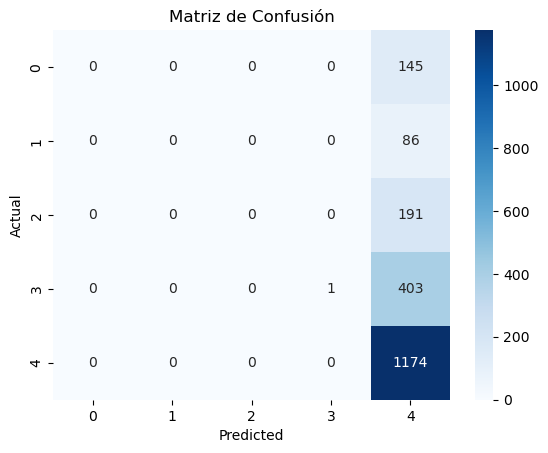

In [86]:
from sklearn.metrics import confusion_matrix
# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)
# Mostrar la matriz de confusión con seaborn
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
# Configurar los ejes y el título
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
# Mostrar la gráfica
plt.show()

In [87]:
#modelo con under y oversampling en el train ya que al modelo anterior le cuesta identificar a las clases minoritarias
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

# Encode the target variable
label_encoder = LabelEncoder()
df_sample['rating_encoded'] = label_encoder.fit_transform(df_sample['rating'])

X = df_sample[['año', 'mes', 'estado', 'ciudad','categoria']]
y = df_sample['rating_encoded']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir las columnas numéricas y categóricas
numeric_features = ['año', 'mes']
categorical_features = ['estado', 'ciudad','categoria']

# Aplicar StandardScaler a las columnas numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

# Aplicar OneHotEncoder a las columnas categóricas
ohe = OneHotEncoder(drop='first')
X_train_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_encoded = ohe.transform(X_test[categorical_features])

# Combinar características escaladas y codificadas
X_train_transformed = np.concatenate([X_train_scaled, X_train_encoded.toarray()], axis=1)
X_test_transformed = np.concatenate([X_test_scaled, X_test_encoded.toarray()], axis=1)

# Obtener el índice de la categoría con más registros
category_max = pd.Series(y_train).value_counts().idxmax()

# Definir el número deseado de registros en cada categoría
desired_samples = 2000
desired_samples_2 = 2000

# Filtrar los registros de la clase mayoritaria
X_train_majority = X_train_transformed[y_train == category_max]
y_train_majority = y_train[y_train == category_max]

# Realizar undersampling en la clase mayoritaria para reducir a 1000 registros
X_train_majority_downsampled, y_train_majority_downsampled = resample(
    X_train_majority, y_train_majority, n_samples=desired_samples, random_state=42
)

# Inicializar listas para almacenar los datos sobremuestreados
X_train_oversampled = []
y_train_oversampled = []

# Realizar oversampling en las clases minoritarias para obtener 1000 registros
for category in y_train.unique():
    if category == category_max:
        continue
    X_train_minority = X_train_transformed[y_train == category]
    y_train_minority = y_train[y_train == category]
    X_train_oversampled_minority, y_train_oversampled_minority = resample(
        X_train_minority, y_train_minority, n_samples=desired_samples_2, random_state=42
    )
    X_train_oversampled.append(X_train_oversampled_minority)
    y_train_oversampled.append(y_train_oversampled_minority)

# Combinar los datos de la clase mayoritaria reducida y las clases minoritarias sobremuestreadas
X_train_combined = np.concatenate([X_train_majority_downsampled] + X_train_oversampled)
y_train_combined = np.concatenate([y_train_majority_downsampled] + y_train_oversampled)

# Definir los modelos a probar y sus respectivos parámetros
models = [
    ('Decision Tree', DecisionTreeClassifier(), {'max_depth': [5, 10, 15, 25]}),
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [50, 100, 200]}),
    ('Naive Bayes', GaussianNB(), {}),
    ('Logistic Regression', LogisticRegression(), {'C': [1.0, 0.5, 0.1]}),
    ('SVM', SVC(), {'C': [1.0, 0.5, 0.1], 'kernel': ['linear', 'rbf']}),
    ('XGBoost', XGBClassifier(), {'max_depth': [5, 10, 15, 5]})
]

# Realizar la búsqueda de hiperparámetros y seleccionar el mejor modelo
best_model = None
best_accuracy = 0.0

for name, model, params in models:
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')

    accuracy_scores = cross_val_score(grid_search, X_train_combined, y_train_combined, cv=5)
    avg_accuracy = accuracy_scores.mean()

    if avg_accuracy > best_accuracy:
        best_model = model
        best_accuracy = avg_accuracy

# Ajustar el mejor modelo en los datos de entrenamiento combinados
best_model.fit(X_train_combined, y_train_combined)

# Predecir los datos de prueba
y_pred = best_model.predict(X_test_transformed)

# Calcular la precisión en los datos de prueba
accuracy = accuracy_score(y_test, y_pred)

print("Mejor modelo:", best_model)
print("Mejores hiperparámetros:", best_model.get_params())
print("Precisión en los datos de prueba:", accuracy)


Mejor modelo: RandomForestClassifier()
Mejores hiperparámetros: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Precisión en los datos de prueba: 0.218


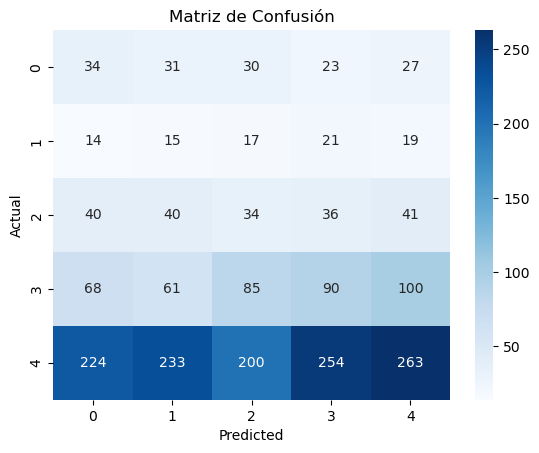

In [88]:
from sklearn.metrics import confusion_matrix
# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)
# Mostrar la matriz de confusión con seaborn
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
# Configurar los ejes y el título
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
# Mostrar la gráfica
plt.show()

In [89]:
""" #disminuyo la cantidad de registros de la clase mayoritaria porque le cuesta predecir las otras clases
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

# Encode the target variable
label_encoder = LabelEncoder()
df_sample['rating_encoded'] = label_encoder.fit_transform(df_sample['rating'])

X = df_sample[['año', 'mes', 'estado', 'ciudad', 'categoria']]
y = df_sample['rating_encoded']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir las columnas numéricas y categóricas
numeric_features = ['año', 'mes']
categorical_features = ['estado', 'ciudad', 'categoria']

# Aplicar StandardScaler a las columnas numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

# Aplicar OneHotEncoder a las columnas categóricas
ohe = OneHotEncoder(drop='first')
X_train_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_encoded = ohe.transform(X_test[categorical_features])

# Combinar características escaladas y codificadas
X_train_transformed = np.concatenate([X_train_scaled, X_train_encoded.toarray()], axis=1)
X_test_transformed = np.concatenate([X_test_scaled, X_test_encoded.toarray()], axis=1)

# Obtener el índice de la categoría con más registros
category_max = pd.Series(y_train).value_counts().idxmax()

# Filtrar los registros de la clase mayoritaria
X_train_majority = X_train_transformed[y_train == category_max]
y_train_majority = y_train[y_train == category_max]

# Realizar undersampling en la clase mayoritaria para reducir a 1000 registros
X_train_majority_downsampled, y_train_majority_downsampled = resample(
    X_train_majority, y_train_majority, n_samples=2500, random_state=42
)

# Filtrar los registros correspondientes al resto de las categorías
X_train_rest_categories = X_train_transformed[y_train != category_max]
y_train_rest_categories = y_train[y_train != category_max]

# Combinar los datos de la clase mayoritaria reducida y las categorías restantes
X_train_combined = np.concatenate([X_train_majority_downsampled, X_train_rest_categories])
y_train_combined = np.concatenate([y_train_majority_downsampled, y_train_rest_categories])

# Definir los modelos a probar y sus respectivos parámetros
models = [
    ('Decision Tree', DecisionTreeClassifier(), {'max_depth': [10, 15, 25]}),
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [50, 100, 200]}),
    ('Naive Bayes', GaussianNB(), {}),
    ('Logistic Regression', LogisticRegression(), {'C': [1.0, 0.5, 0.1]}),
    ('SVM', SVC(), {'C': [1.0, 0.5, 0.1], 'kernel': ['linear', 'rbf']}),
    ('XGBoost', XGBClassifier(), {'max_depth': [10, 15, 25]})
]

# Realizar la búsqueda de hiperparámetros y seleccionar el mejor modelo
best_model = None
best_accuracy = 0.0

for name, model, params in models:
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')

    accuracy_scores = cross_val_score(grid_search, X_train_combined, y_train_combined, cv=5)
    avg_accuracy = accuracy_scores.mean()

    if avg_accuracy > best_accuracy:
        best_model = model
        best_accuracy = avg_accuracy

# Ajustar el mejor modelo en los datos de entrenamiento combinados
best_model.fit(X_train_combined, y_train_combined)

# Predecir los datos de prueba
y_pred = best_model.predict(X_test_transformed)

# Calcular la precisión en los datos de prueba
accuracy = accuracy_score(y_test, y_pred)

print("Mejor modelo:", best_model)
print("Mejores hiperparámetros:", best_model.get_params())
print("Precisión en los datos de prueba:", accuracy) """

' #disminuyo la cantidad de registros de la clase mayoritaria porque le cuesta predecir las otras clases\nfrom sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.svm import SVC\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom xgboost import XGBClassifier\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.utils import resample\nimport warnings\nwarnings.filterwarnings(\'ignore\')\n\n# Encode the target variable\nlabel_encoder = LabelEncoder()\ndf_sample[\'rating_encoded\'] = label_encoder.fit_transform(df_sample[\'rating\'])\n\nX = df_sample[[\'año\', \'mes\', \'estado\', \'ciudad\', \'categoria\']]\ny = df_sam

In [90]:
""" from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión con seaborn
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Configurar los ejes y el título
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show() """

" from sklearn.metrics import confusion_matrix\n\n# Calcular la matriz de confusión\nconfusion_mat = confusion_matrix(y_test, y_pred)\n\n# Mostrar la matriz de confusión con seaborn\nsns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')\n\n# Configurar los ejes y el título\nplt.xlabel('Predicted')\nplt.ylabel('Actual')\nplt.title('Matriz de Confusión')\n\n# Mostrar la gráfica\nplt.show() "

In [91]:
# #modelo con oversampling en el train
# from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler
# import warnings
# warnings.filterwarnings('ignore')

# # Encode the target variable
# label_encoder = LabelEncoder()
# df_sample['rating_encoded'] = label_encoder.fit_transform(df_sample['rating'])

# X = df_sample[['año', 'mes', 'estado', 'ciudad']]
# y = df_sample['rating_encoded']

# # Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Definir las columnas numéricas y categóricas
# numeric_features = ['año', 'mes']
# categorical_features = ['estado', 'ciudad']

# # Aplicar StandardScaler a las columnas numéricas
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train[numeric_features])
# X_test_scaled = scaler.transform(X_test[numeric_features])

# # Aplicar OneHotEncoder a las columnas categóricas
# ohe = OneHotEncoder(drop='first')
# X_train_encoded = ohe.fit_transform(X_train[categorical_features])
# X_test_encoded = ohe.transform(X_test[categorical_features])

# # Combinar características escaladas y codificadas
# X_train_transformed = np.concatenate([X_train_scaled, X_train_encoded.toarray()], axis=1)
# X_test_transformed = np.concatenate([X_test_scaled, X_test_encoded.toarray()], axis=1)

# # Aplicar RandomOverSampler al conjunto de entrenamiento
# oversampler = RandomOverSampler(random_state=42)
# X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_transformed, y_train)

# # Definir los modelos a probar y sus respectivos parámetros
# models = [
#     ('Decision Tree', DecisionTreeClassifier(), {'max_depth': [10, 50, 100]}),
#     ('Random Forest', RandomForestClassifier(), {'n_estimators': [50, 100, 200]}),
#     ('Naive Bayes', GaussianNB(), {}),
#     ('Logistic Regression', LogisticRegression(), {'C': [1.0, 0.5, 0.1]}),
#     ('SVM', SVC(), {'C': [1.0, 0.5, 0.1], 'kernel': ['linear', 'rbf']}),
#     #('KNN', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
#     ('XGBoost', XGBClassifier(), {'max_depth': [50, 100, 200]})
# ]

# # Realizar la búsqueda de hiperparámetros y seleccionar el mejor modelo
# best_model = None
# best_accuracy = 0.0

# for name, model, params in models:
#     grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')

#     accuracy_scores = cross_val_score(grid_search, X_train_oversampled, y_train_oversampled, cv=5)
#     avg_accuracy = accuracy_scores.mean()

#     if avg_accuracy > best_accuracy:
#         best_model = model
#         best_accuracy = avg_accuracy

# # Ajustar el mejor modelo en los datos de entrenamiento
# best_model.fit(X_train_oversampled, y_train_oversampled )

# # Predecir los datos de prueba
# y_pred = best_model.predict(X_test_transformed)

# # Calcular la precisión en los datos de prueba
# accuracy = accuracy_score(y_test, y_pred)

# print("Mejor modelo:", best_model)
# print("Precisión en los datos de prueba:", accuracy)

Pruebo mi mejor algoritmo responde a la pregunta: Cual podria ser la puntuacion de un coffee shop en fresno en 2024? Esa puntacion que probabilidad tiene de ocurrencia? Si la puntacion no es buena o la probabilidad no es la deseada con una nube de palabras evaluo puntos de mejora filtrando por los puntajes mas bajos...

In [92]:
# New sample
new_sample = pd.DataFrame({'año': [2023], 'mes': [6], 'estado': ['california'], 'ciudad': ['fresno'], 'categoria': ['coffee shop']})

# Apply StandardScaler to the numeric features
new_sample_scaled = scaler.transform(new_sample[numeric_features])

# Apply OneHotEncoder to the categorical features
new_sample_encoded = ohe.transform(new_sample[categorical_features])

# Combine the scaled and encoded features
new_sample_transformed = np.concatenate([new_sample_scaled, new_sample_encoded.toarray()], axis=1)

# Predict with the best model
prediction = best_model.predict(new_sample_transformed)

# Decode the predicted label
predicted_rating = label_encoder.inverse_transform(prediction)

print("Predicted Rating:", predicted_rating)


Predicted Rating: [2]


In [93]:
# Predict with the best model
probabilities = best_model.predict_proba(new_sample_transformed)

# Get the index of the predicted class
predicted_class_index = prediction[0]

# Get the probability of the predicted class
predicted_class_probability = probabilities[0][predicted_class_index]

print("Predicted Class Probability:", predicted_class_probability)

Predicted Class Probability: 0.3205879044584287


In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Filtrar el DataFrame original
selected_state = 'california'
selected_city = 'fresno'
selected_category = 'coffee shop'

filtered_df = df_filtrado[(df_filtrado['estado'] == selected_state) & (df_filtrado['ciudad'] == selected_city) & (df_filtrado['categoria'] == selected_category) & (df_filtrado['rating'] <= 3)]

# Concatenar las reseñas filtradas en una sola cadena de texto
text = ' '.join(filtered_df['text'])

# Preprocesamiento de texto
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords]
    return ' '.join(words)

preprocessed_text = preprocess_text(text)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(preprocessed_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
prueba=df_filtrado[(df_filtrado['estado'] == selected_state) & (df_filtrado['ciudad'] == selected_city) & (df_filtrado['categoria'] == selected_category)]

In [ ]:
prueba.head()